Objective:
This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.
Dataset:
Given "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.

In [545]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [677]:
df = pd.read_csv('adult_with_headers.csv')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


1. Data Exploration and Preprocessing:
•	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
•	Handle missing values as per the best practices (imputation, removal, etc.).
•	Apply scaling techniques to numerical features:
•	Standard Scaling
•	Min-Max Scaling
•	Discuss the scenarios where each scaling technique is preferred and why.

In [680]:
df.info()        # total non null is equal for all , no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [682]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [684]:
df.dtypes   

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [686]:
df.isna().sum()    # no missing values

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [688]:
df['sex'].value_counts()        # less then 5 categories    can apply get dummies one hot encoding method

sex
Male      21790
Female    10771
Name: count, dtype: int64

In [690]:
df['race'].value_counts()        # total 5 categories     can apply either get dummies or label encoding method

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

In [692]:
df['relationship'].value_counts()      #   more then 5 categories , wll apply lbabel encoding method

relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

In [694]:
df['occupation'].value_counts()        #   more then 5 categories , wll apply babel encoding method

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [696]:
df['marital_status'].value_counts()       #   more then 5 categories , wll apply lbabel encoding method

marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [698]:
df['education_num'].value_counts()                   

education_num
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: count, dtype: int64

In [700]:
df['education'].value_counts()                    #   more then 5 categories , wll apply lbabel encoding method

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [702]:
df['workclass'].value_counts()                             #   more then 5 categories , wll apply lbabel encoding method

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [704]:
df['native_country'].value_counts()            #   more then 5 categories , wll apply lbabel encoding method

native_country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [706]:
df['income'].value_counts()          # less then 5 categories    can apply get dummies one hot encoding method

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

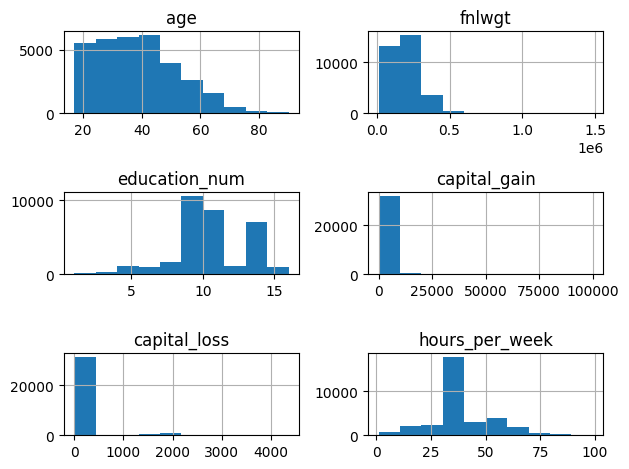

In [708]:
df.hist()
plt.tight_layout()

<Axes: >

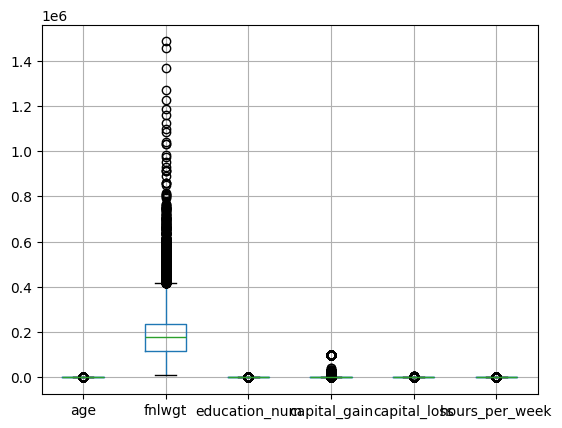

In [709]:
df.boxplot()                   # outliers are present 

Scaling is a crucial preprocessing step in machine learning, particularly for algorithms that are sensitive to the scale of features. It ensures that features with different ranges contribute equally to the model's learning process.

Here are two common scaling techniques:

Standard Scaling (Z-score Normalization)
How it works:

Subtracts the mean of the feature from each data point.
Divides the result by the standard deviation of the feature.
When to Use:

Algorithms sensitive to feature scale: Algorithms like K-Means, Principal Component Analysis (PCA), and Support Vector Machines (SVM) benefit from feature scaling.
Features with different units: When features have different units (e.g., meters and kilograms), standard scaling helps to bring them to a common scale.

In [712]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number'])
categorical_cols = df.select_dtypes(include=['object'])

In [715]:
numerical_cols

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [717]:
sc = StandardScaler()

In [719]:
scaler_df = pd.DataFrame(sc.fit_transform(numerical_cols), columns = numerical_cols.columns)
scaler_df   #range from -3 to 3

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


Min-Max Scaling (Normalization)
How it works:

Rescales the feature values to a specific range, typically between 0 and 1.

When to Use:

Preserving original data range: If it's important to maintain the original range of values (e.g., image pixel values), min-max scaling can be useful.
Neural networks: Some neural network activation functions, like sigmoid and tanh, work better with input values in a specific range.

Choosing the Right Scaling Technique:

Standard Scaling:
Effective for algorithms sensitive to feature scale.
Can be influenced by outliers.
Min-Max Scaling:
Preserves original data range.
Sensitive to outliers.

Outliers: Outliers can significantly impact the scaling process. Consider robust scaling techniques or outlier removal before scaling.
Feature Importance: Scaling can affect the relative importance of features. Be mindful of this when interpreting model results.
Data Distribution: The choice of scaling technique can depend on the distribution of your data. For example, if your data is normally distributed, standard scaling might be more appropriate.

In [723]:
mn = MinMaxScaler()

In [725]:
minmax_df = pd.DataFrame(mn.fit_transform(numerical_cols),columns=numerical_cols.columns)
minmax_df     # range frm 0 to 1

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


2. Encoding Techniques:
•	Apply One-Hot Encoding to categorical variables with less than 5 categories.
•	Use Label Encoding for categorical variables with more than 5 categories.
•	Discuss the pros and cons of One-Hot Encoding and Label Encoding.


In [728]:
categorical_cols

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [731]:
income_df = pd.get_dummies(data=df,columns=['income'],dtype=int)
income_df        # having categories less then 5 

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_ <=50K,income_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,1,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,1,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,1,0


In [733]:
df = pd.get_dummies(data=df,columns=['sex'],dtype=int)
df    # having categories less then 5

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Female,sex_ Male
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,<=50K,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,<=50K,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,<=50K,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,<=50K,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,<=50K,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,38,United-States,<=50K,1,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,40,United-States,>50K,0,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,40,United-States,<=50K,1,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,20,United-States,<=50K,0,1


using ONEHOTENCODER 

In [736]:
from sklearn.preprocessing import OneHotEncoder

In [738]:
OHE = OneHotEncoder()

In [740]:
OHE_df = pd.DataFrame(OHE.fit_transform(df[['race']]).toarray())
OHE_df

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
32556,0.0,0.0,0.0,0.0,1.0
32557,0.0,0.0,0.0,0.0,1.0
32558,0.0,0.0,0.0,0.0,1.0
32559,0.0,0.0,0.0,0.0,1.0


In [742]:
# using pandas 

In [744]:
race_df = pd.get_dummies(data=df,columns=['race'],dtype=int)
race_df     # having categories total 5 

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Female,sex_ Male,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,2174,0,40,United-States,<=50K,0,1,0,0,0,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,13,United-States,<=50K,0,1,0,0,0,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,40,United-States,<=50K,0,1,0,0,0,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,40,United-States,<=50K,0,1,0,0,1,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,40,Cuba,<=50K,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,0,0,38,United-States,<=50K,1,0,0,0,0,0,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,0,0,40,United-States,>50K,0,1,0,0,0,0,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,0,0,40,United-States,<=50K,1,0,0,0,0,0,1
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,0,0,20,United-States,<=50K,0,1,0,0,0,0,1


In [746]:
# using labelencoder

In [748]:
# categories which are more then 5
label_encoder = LabelEncoder()

In [750]:
df['marital_status'] = label_encoder.fit_transform(df['marital_status'])
df['occupation']  = label_encoder.fit_transform(df['occupation'])
df['relationship']  = label_encoder.fit_transform(df['relationship'])
df['native_country']  = label_encoder.fit_transform(df['native_country'])
df['workclass']  = label_encoder.fit_transform(df['workclass'])
df['education']  = label_encoder.fit_transform(df['education'])
df['race']  = label_encoder.fit_transform(df['race'])
df['income']  = label_encoder.fit_transform(df['income'])

In [754]:
df     # every column is converted to numerical form

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Female,sex_ Male
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0,0,1
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0,0,1
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0,0,1
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0,0,1
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,0,1,0
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,1,0,1
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,0,1,0
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,0,0,1


3. Feature Engineering:
•	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
•	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.


 capital_gain , capital_loss , hours_per_week :- working on the these 3 features and creating a new one using below formula
 
Formula: net_financial_gain = capital_gain - capital_loss


In [758]:
df['net_financial_gain'] = df['capital_gain'] - df['capital_loss']

In [760]:
# This feature represents the overall financial gain or loss from investments and other activities.

In [762]:
df   # creating a new feature named   net_financial_gain

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Female,sex_ Male,net_financial_gain
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0,0,1,2174
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0,0,1,0
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0,0,1,0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0,0,1,0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,0,1,0,0
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,1,0,1,0
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,0,1,0,0
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,0,0,1,0


financial_activity_index = (capital_gain + capital_loss) / hours_per_week  

uaing this formula calculating , financial activity index , by using capital gain , capital loss , and hours per week column 

In [765]:
df['financial_activity_index'] = (df['capital_gain'] + df['capital_loss']) / df['hours_per_week']

In [767]:
df          # his index measures the intensity of financial activity per hour worked.

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Female,sex_ Male,net_financial_gain,financial_activity_index
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0,0,1,2174,54.35
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0,0,1,0,0.00
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0,0,1,0,0.00
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0,0,1,0,0.00
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0,1,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,0,1,0,0,0.00
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,1,0,1,0,0.00
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,0,1,0,0,0.00
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,0,0,1,0,0.00


if there are outliers , but dont have to remove outliers , so to settle down the data in proper  form with outliers , Data transformation is used, such as log or sqrt transformation

In [770]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Female,sex_ Male,net_financial_gain,financial_activity_index
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0,0,1,2174,54.35
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0,0,1,0,0.00
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0,0,1,0,0.00
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0,0,1,0,0.00
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0,1,0,0,0.00


<Axes: >

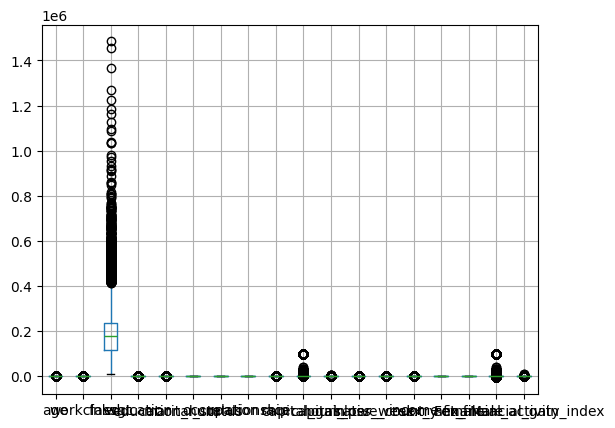

In [772]:
df.boxplot()

<Axes: >

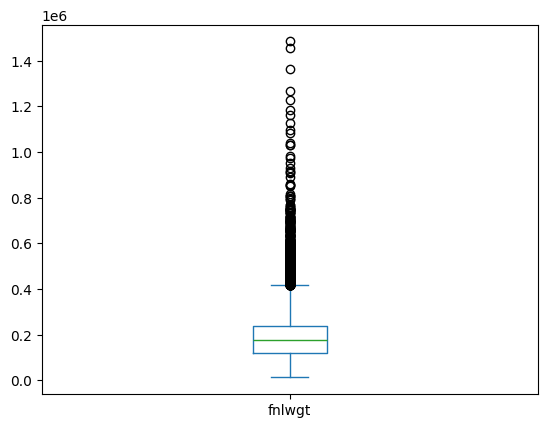

In [773]:
df['fnlwgt'].plot(kind='box')       # performing log transformation on this column

In [774]:
df['fnlwgt'] = np.log(df['fnlwgt'])

In [776]:
df   # after log transformation for fnlwgt column 

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Female,sex_ Male,net_financial_gain,financial_activity_index
0,39,7,11.258240,9,13,4,1,1,4,2174,0,40,39,0,0,1,2174,54.35
1,50,6,11.330336,9,13,2,4,0,4,0,0,13,39,0,0,1,0,0.00
2,38,4,12.281393,11,9,0,6,1,4,0,0,40,39,0,0,1,0,0.00
3,53,4,12.366153,1,7,2,6,0,2,0,0,40,39,0,0,1,0,0.00
4,28,4,12.732011,9,13,2,10,5,2,0,0,40,5,0,1,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,12.458006,7,12,2,13,5,4,0,0,38,39,0,1,0,0,0.00
32557,40,4,11.947134,11,9,2,7,0,4,0,0,40,39,1,0,1,0,0.00
32558,58,4,11.931044,11,9,6,1,4,4,0,0,40,39,0,1,0,0,0.00
32559,22,4,12.213495,11,9,4,1,3,4,0,0,20,39,0,0,1,0,0.00


4. Feature Selection:
   
•	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance

.
•	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.


In [781]:
from sklearn.ensemble import IsolationForest

In [783]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Female,sex_ Male,net_financial_gain,financial_activity_index
0,39,7,11.258240,9,13,4,1,1,4,2174,0,40,39,0,0,1,2174,54.35
1,50,6,11.330336,9,13,2,4,0,4,0,0,13,39,0,0,1,0,0.00
2,38,4,12.281393,11,9,0,6,1,4,0,0,40,39,0,0,1,0,0.00
3,53,4,12.366153,1,7,2,6,0,2,0,0,40,39,0,0,1,0,0.00
4,28,4,12.732011,9,13,2,10,5,2,0,0,40,5,0,1,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,12.458006,7,12,2,13,5,4,0,0,38,39,0,1,0,0,0.00
32557,40,4,11.947134,11,9,2,7,0,4,0,0,40,39,1,0,1,0,0.00
32558,58,4,11.931044,11,9,6,1,4,4,0,0,40,39,0,1,0,0,0.00
32559,22,4,12.213495,11,9,4,1,3,4,0,0,20,39,0,0,1,0,0.00


In [785]:
# what is outlier here?
#iso=IsolationForest(random_state=10)# expecting 10 % outlier in dataset
iso=IsolationForest(random_state=10,contamination=0.1)
iso.fit(df)


IsolationForest(contamination=0.1, random_state=10)

In [786]:
out=iso.predict(df)

In [788]:
out   # -1: outlier - last value is an outlier

array([ 1,  1,  1, ...,  1,  1, -1])

In [791]:
df['Score'] = out
df # the Score named column is added to the dataset

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Female,sex_ Male,net_financial_gain,financial_activity_index,Score
0,39,7,11.258240,9,13,4,1,1,4,2174,0,40,39,0,0,1,2174,54.35,1
1,50,6,11.330336,9,13,2,4,0,4,0,0,13,39,0,0,1,0,0.00,1
2,38,4,12.281393,11,9,0,6,1,4,0,0,40,39,0,0,1,0,0.00,1
3,53,4,12.366153,1,7,2,6,0,2,0,0,40,39,0,0,1,0,0.00,1
4,28,4,12.732011,9,13,2,10,5,2,0,0,40,5,0,1,0,0,0.00,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,12.458006,7,12,2,13,5,4,0,0,38,39,0,1,0,0,0.00,1
32557,40,4,11.947134,11,9,2,7,0,4,0,0,40,39,1,0,1,0,0.00,1
32558,58,4,11.931044,11,9,6,1,4,4,0,0,40,39,0,1,0,0,0.00,1
32559,22,4,12.213495,11,9,4,1,3,4,0,0,20,39,0,0,1,0,0.00,1


In [793]:
#Print the outlier data points
df[df['Score']==-1]
# scores are given by decision tree

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Female,sex_ Male,net_financial_gain,financial_activity_index,Score
4,28,4,12.732011,9,13,2,10,5,2,0,0,40,5,0,1,0,0,0.000000,-1
8,31,4,10.731624,12,14,4,10,1,4,14084,0,50,39,1,1,0,14084,281.680000,-1
11,30,7,11.858619,9,13,2,10,0,1,0,0,40,19,1,0,1,0,0.000000,-1
23,43,4,11.670245,1,7,2,14,0,4,0,2042,40,39,0,0,1,-2042,51.050000,-1
27,54,0,12.101884,15,10,2,0,0,1,0,0,60,35,1,0,1,0,0.000000,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,30,0,10.428541,9,13,4,0,1,1,0,0,99,39,0,1,0,0,0.000000,-1
32538,38,4,11.843523,9,13,0,10,4,2,15020,0,45,39,1,1,0,15020,333.777778,-1
32539,71,0,12.568533,10,16,2,0,0,4,0,0,10,39,1,0,1,0,0.000000,-1
32551,32,4,10.436055,0,6,2,6,0,0,0,0,40,39,0,0,1,0,0.000000,-1


PPS SCORE

In [664]:
#install the package
!pip install ppscore

  Using cached ppscore-1.3.0-py2.py3-none-any.whl
  Using cached pandas-1.5.3.tar.gz (5.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: still running...
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pandas


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [2514 lines of output]
  <string>:19: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpython-312\pandas
  copying pandas\conftest.py -> build\lib.win-amd64-cpython-312\pandas
  copying pandas\testing.py -> build\lib.win-amd64-cpython-312\pandas
  copying pandas\_typing.py -> build\lib.win-amd64-cpython-312\pandas
  copying pandas\_version.py -> build\lib.win-amd64-cpython-312\pandas
  copying pandas\__init__.py -> build\lib.win-amd64-cpython-312\pandas
  creating build\lib.win-amd64-cpython-312\pandas\api
  copying pandas\api\__init__.py -> build\lib.win-amd64-cpython-312\pandas\api
  creating build\lib.win-amd64-cpython-312\pandas\arrays
  copying pandas\arrays\__init__.py -> build\lib.win-amd64-cpython-312\pandas\arrays
  creating build\lib.win-amd64-cpython-312\pand

In [665]:
import ppscore as pps

ModuleNotFoundError: No module named 'ppscore'

In [ ]:
# Syntax: pps.score(df, "feature_column", "target_column")
pps.score(data, "age", "income") # ppscore:0.55 so ok kind of score

In [ ]:
#calculate the whole PPS matrix
pps.matrix(df)# petal width with species is most imp varaible with pps score 0.9276

In [ ]:
df=pd.DataFrame(pps.matrix(data))
df[df.case!='predict_itself'].iloc[:,[0,1,2,3,5,8]].sort_values('ppscore',ascending=False)
# PPScore is highest in petal.width and species i.e. 0.927652 i.e. petal width is very good feature in predicting species

In [ ]:
# using other method

In [795]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Female,sex_ Male,net_financial_gain,financial_activity_index,Score
0,39,7,11.258240,9,13,4,1,1,4,2174,0,40,39,0,0,1,2174,54.35,1
1,50,6,11.330336,9,13,2,4,0,4,0,0,13,39,0,0,1,0,0.00,1
2,38,4,12.281393,11,9,0,6,1,4,0,0,40,39,0,0,1,0,0.00,1
3,53,4,12.366153,1,7,2,6,0,2,0,0,40,39,0,0,1,0,0.00,1
4,28,4,12.732011,9,13,2,10,5,2,0,0,40,5,0,1,0,0,0.00,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,12.458006,7,12,2,13,5,4,0,0,38,39,0,1,0,0,0.00,1
32557,40,4,11.947134,11,9,2,7,0,4,0,0,40,39,1,0,1,0,0.00,1
32558,58,4,11.931044,11,9,6,1,4,4,0,0,40,39,0,1,0,0,0.00,1
32559,22,4,12.213495,11,9,4,1,3,4,0,0,20,39,0,0,1,0,0.00,1


In [797]:
corr_matrix = df.corr()

In [799]:
target_variable = 'income'

In [801]:
def calculate_pps(corr_matrix, target_variable):
    pps_scores = {}
    for col in corr_matrix.columns:
        if col != target_variable:
            corr = corr_matrix[col][target_variable]
            pps = abs(corr) * np.sign(corr)
            pps_scores[col] = pps
    return pps_scores

In [803]:
pps_scores = calculate_pps(corr_matrix, target_variable)

In [805]:
pps_scores

{'age': 0.23403710264885705,
 'workclass': 0.05160427305079273,
 'fnlwgt': -0.0013734902176894596,
 'education': 0.07931660927729946,
 'education_num': 0.3351539526909404,
 'marital_status': -0.19930700917198033,
 'occupation': 0.07546819757760992,
 'relationship': -0.25091814171775007,
 'race': 0.0718456114740241,
 'capital_gain': 0.22332881819538047,
 'capital_loss': 0.15052631177035347,
 'hours_per_week': 0.2296890656708114,
 'native_country': 0.015840263042559522,
 'sex_ Female': -0.2159801505840362,
 'sex_ Male': 0.21598015058403638,
 'net_financial_gain': 0.21442775488399832,
 'financial_activity_index': 0.1979031970465577,
 'Score': -0.2046926570029585}

In [807]:
ranked_features = pd.Series(pps_scores).sort_values(ascending=False)
print(ranked_features)

education_num               0.335154
age                         0.234037
hours_per_week              0.229689
capital_gain                0.223329
sex_ Male                   0.215980
net_financial_gain          0.214428
financial_activity_index    0.197903
capital_loss                0.150526
education                   0.079317
occupation                  0.075468
race                        0.071846
workclass                   0.051604
native_country              0.015840
fnlwgt                     -0.001373
marital_status             -0.199307
Score                      -0.204693
sex_ Female                -0.215980
relationship               -0.250918
dtype: float64
